In [52]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [53]:
# Define constants
DATA_DIR = "C:\\Users\\shashwat\\OneDrive\\Desktop\\Facial recognition\\Facial_Recognition\\images"
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

In [54]:
def load_data():
  images = []
  labels = []

  for emotion_label, emotion in enumerate(EMOTIONS):
    emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
    if os.path.isdir(emotion_dir):
      for img_file in os.listdir(emotion_dir):
        img_path = os.path.join(emotion_dir, img_file)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        images.append(img_resized)
        labels.append(emotion_label)
    else:
      print(f"Directory not found for emotion {emotion}: {emotion_dir}")

  return np.array(images), np.array(labels)


#Load the data
images, labels = load_data()


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

#Normalize the pixel value 
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reshape data for CNN input 
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


Number of images:  64
Shape of images array:  (64, 48, 48)
Number of labels: 64


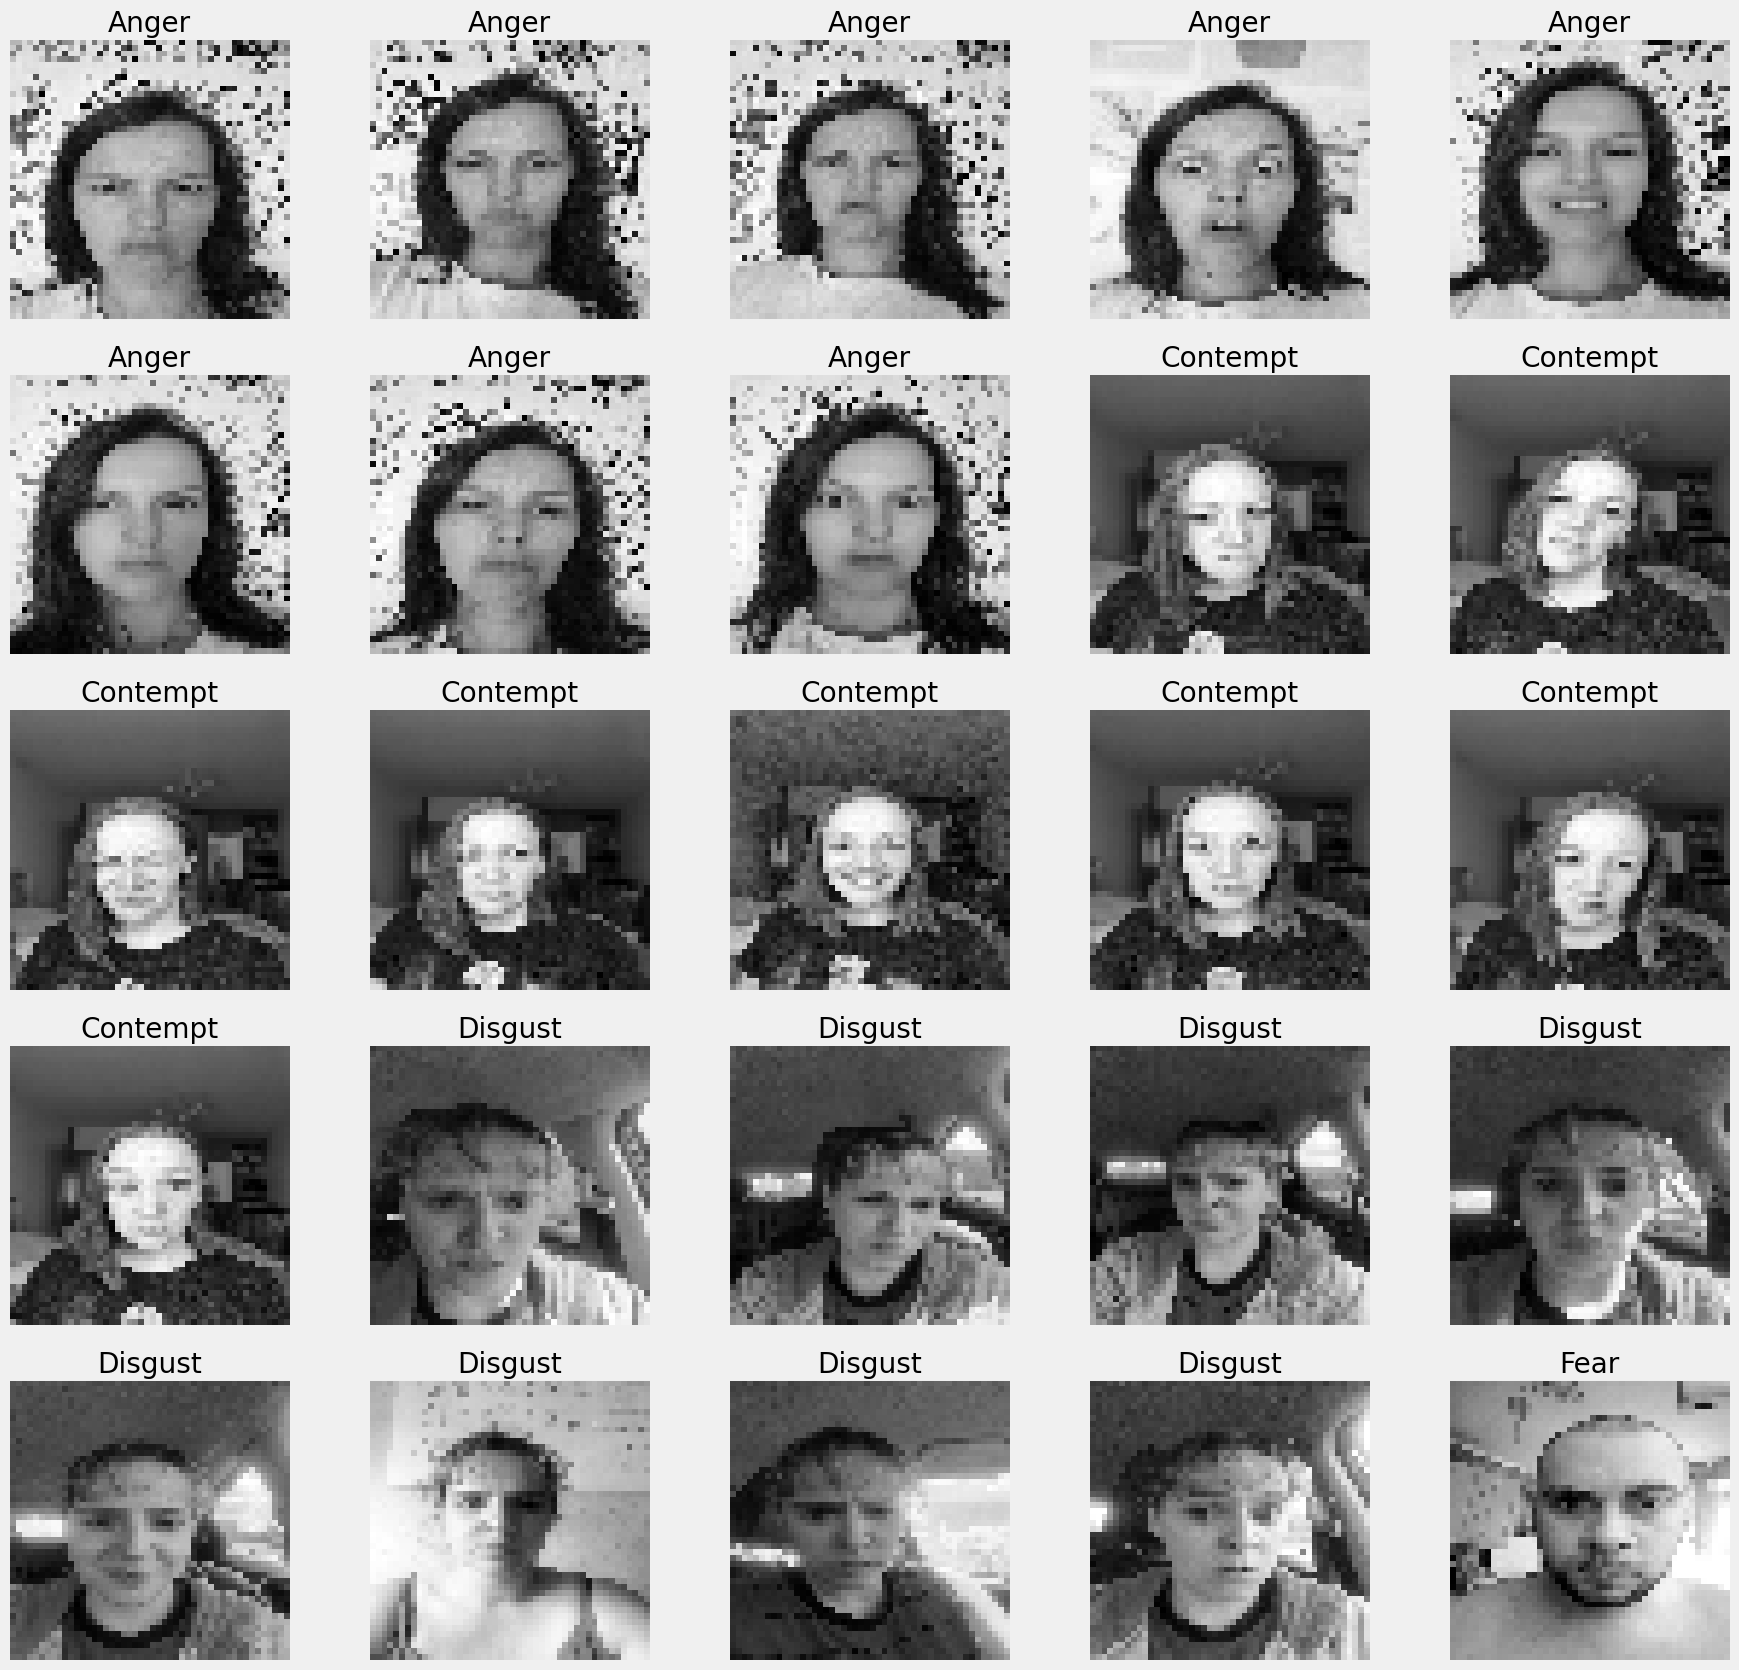

In [55]:
# Print information about the dataset 
print("Number of images: ", len(images))
print("Shape of images array: ", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 20))
for i in range(25): 
  plt.subplot(5, 5, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(EMOTIONS[labels[i]])
  plt.axis('off')
plt.show()

In [56]:
# Data augmentation 
datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True
)
datagen.fit(X_train)

In [57]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(len(EMOTIONS), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

In [58]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 1s 339ms/step - loss: 2.1065 - accuracy: 0.0784 - val_loss: 2.0875 - val_accuracy: 0.0769
Epoch 2/50
2/2 [==============================] - 0s 130ms/step - loss: 2.0602 - accuracy: 0.1373 - val_loss: 2.0908 - val_accuracy: 0.0769
Epoch 3/50
2/2 [==============================] - 0s 85ms/step - loss: 2.0638 - accuracy: 0.1176 - val_loss: 2.0974 - val_accuracy: 0.1538
Epoch 4/50
2/2 [==============================] - 0s 75ms/step - loss: 2.0650 - accuracy: 0.1373 - val_loss: 2.0870 - val_accuracy: 0.0769
Epoch 5/50
2/2 [==============================] - 0s 84ms/step - loss: 2.0256 - accuracy: 0.1961 - val_loss: 2.0818 - val_accuracy: 0.0769
Epoch 6/50
2/2 [==============================] - 0s 87ms/step - loss: 2.0261 - accuracy: 0.2157 - val_loss: 2.0657 - val_accuracy: 0.0769
Epoch 7/50
2/2 [==============================] - 0s 72ms/step - loss: 2.0863 - accuracy: 0.1569 - val_loss: 2.0293 - val_accuracy: 0.1538
Epoch 8/50
2/2 [=========

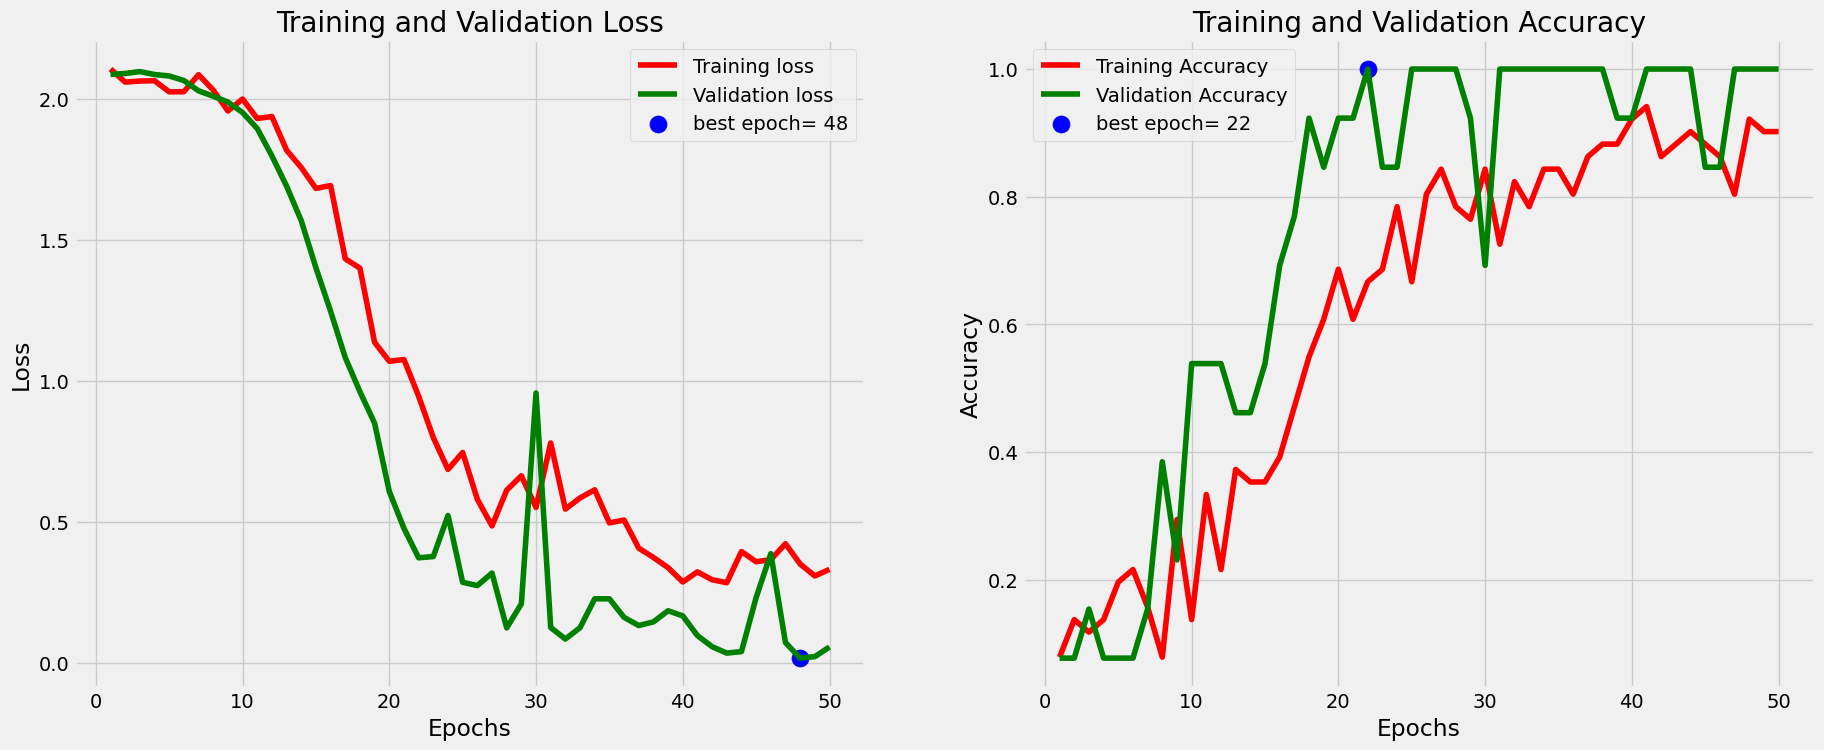

In [59]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [60]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 - 0s - loss: 0.0562 - accuracy: 1.0000 - 137ms/epoch - 137ms/step
Test Loss: 0.05617915838956833
Test Accuracy: 1.0


In [61]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels, target_names=EMOTIONS))

1/1 [==============================] - 0s 173ms/step
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
     Disgust       1.00      1.00      1.00         1
        Fear       1.00      1.00      1.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
   Surprised       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



1/1 [==============================] - 0s 104ms/step


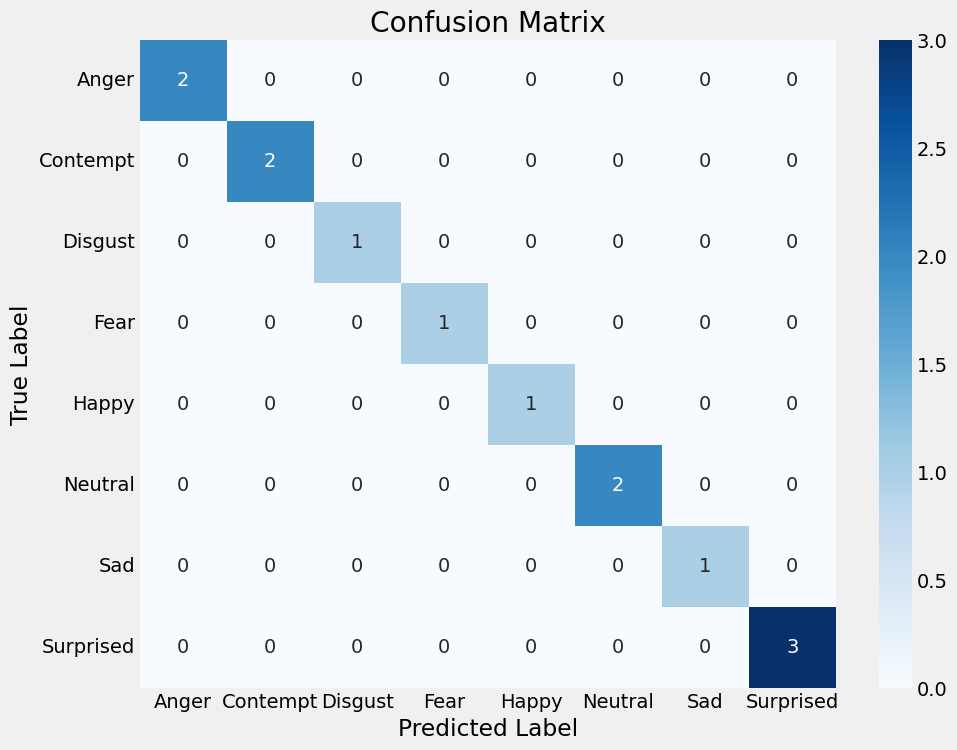

In [62]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 95ms/step


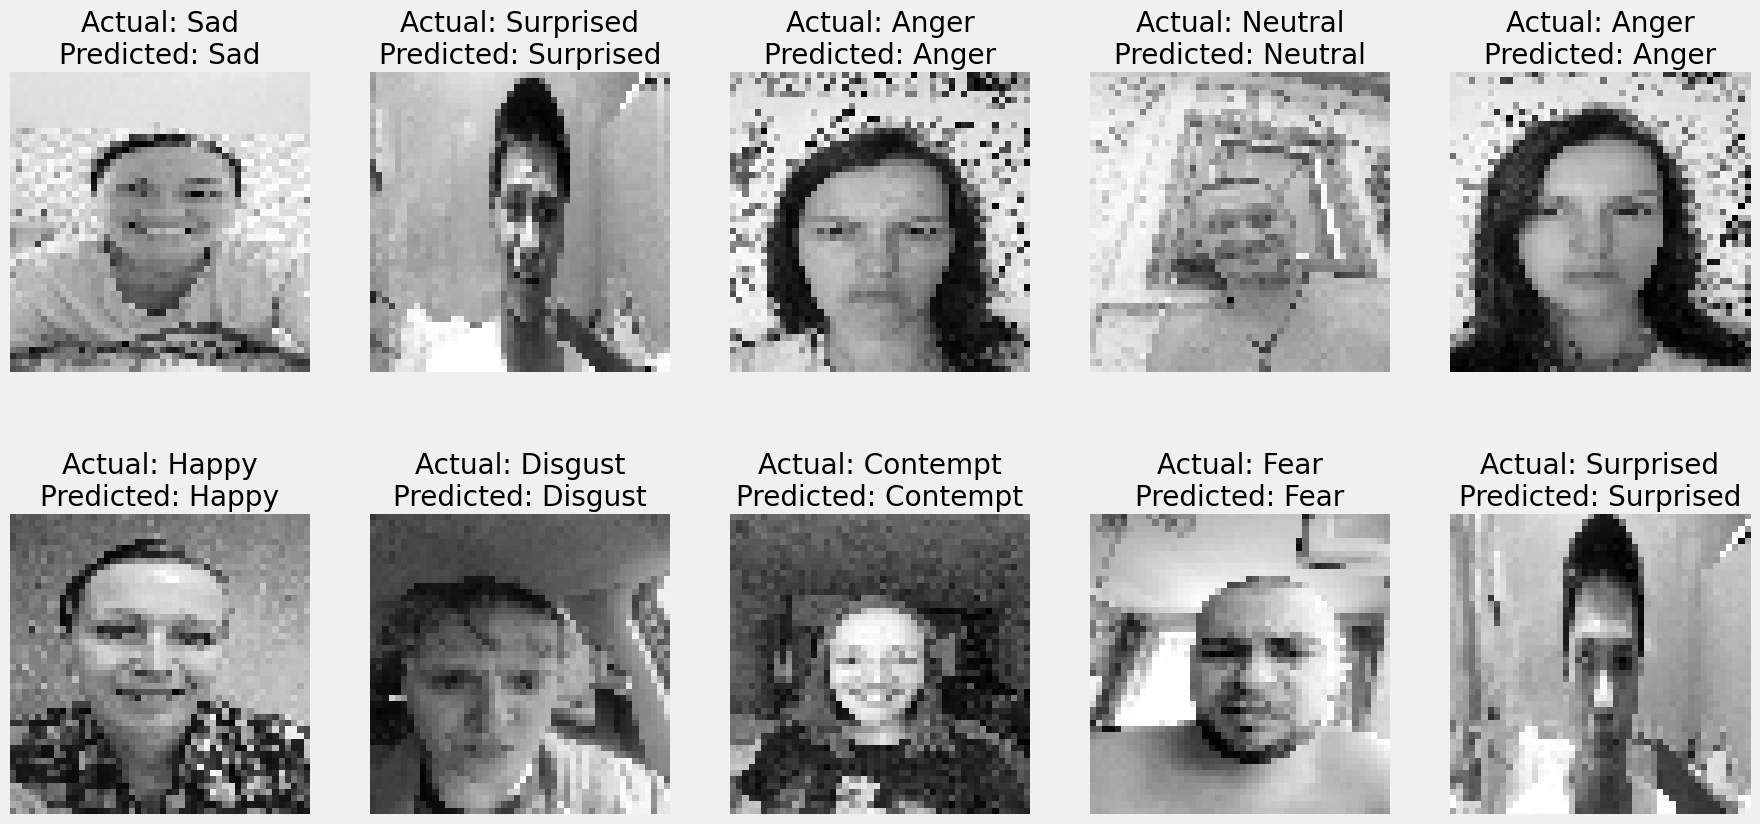

In [66]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Function to display images with predicted and actual labels
def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        # Since the images are grayscale, we reshape them to (48, 48)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

    # Display the images with predicted and actual labels
display_images(X_test, y_test, predicted_labels, EMOTIONS)

In [67]:
model_json = model.to_json()
with open("emotionDetector.json", "w") as json_file:
  json_file.write(model_json)

model.save("emotionDetector.h5") 